# Car Sales - Regression ANN

### by ReDay Zarra

This project utilizes an **artificial neural network to perform a regression task**, which means the model will predict a value based on the features. In this case, the model will have **five features to predict the purchasing amount** for each customer. This project showcases a *step-by-step implementation* of the model as well as *in-depth notes* to customize the model further for higher accuracy.

## Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np

> Classic libraries that will help us read and analyze data. Pandas is a library used **for data frame manipulations**. NumPy is a package used for **numerical analysis**.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set_style('darkgrid')

> Libraries used for **plotting and data visualization**.

## Importing the dataset

Importing the dataset with the **.read_csv method from Pandas to load the dataset** and storing it **in the car_data** variable. However, we will need to change to encoding for the data file because it contains characters (such as '@') that Pandas can't read. We specify the ISO-8859-1 encoding for the datafile to be imported. 

In [3]:
car_data = pd.read_csv('Car_Purchasing_Data.csv', encoding = "ISO-8859-1")

> The .read_csv method from Pandas accepts a parameter called **encoding** which allows us to specify that we want to **use the ISO-8859-1** encoding method.

In [4]:
car_data.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


> The .head() method is used to **show the first five rows** of the dataframe.

## Visualizing the dataset

Using Seaborn to create plots and visualizing the data that we are working with. 

c:\Users\ATISHAY SG\anaconda3\envs\AIMLSem1\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


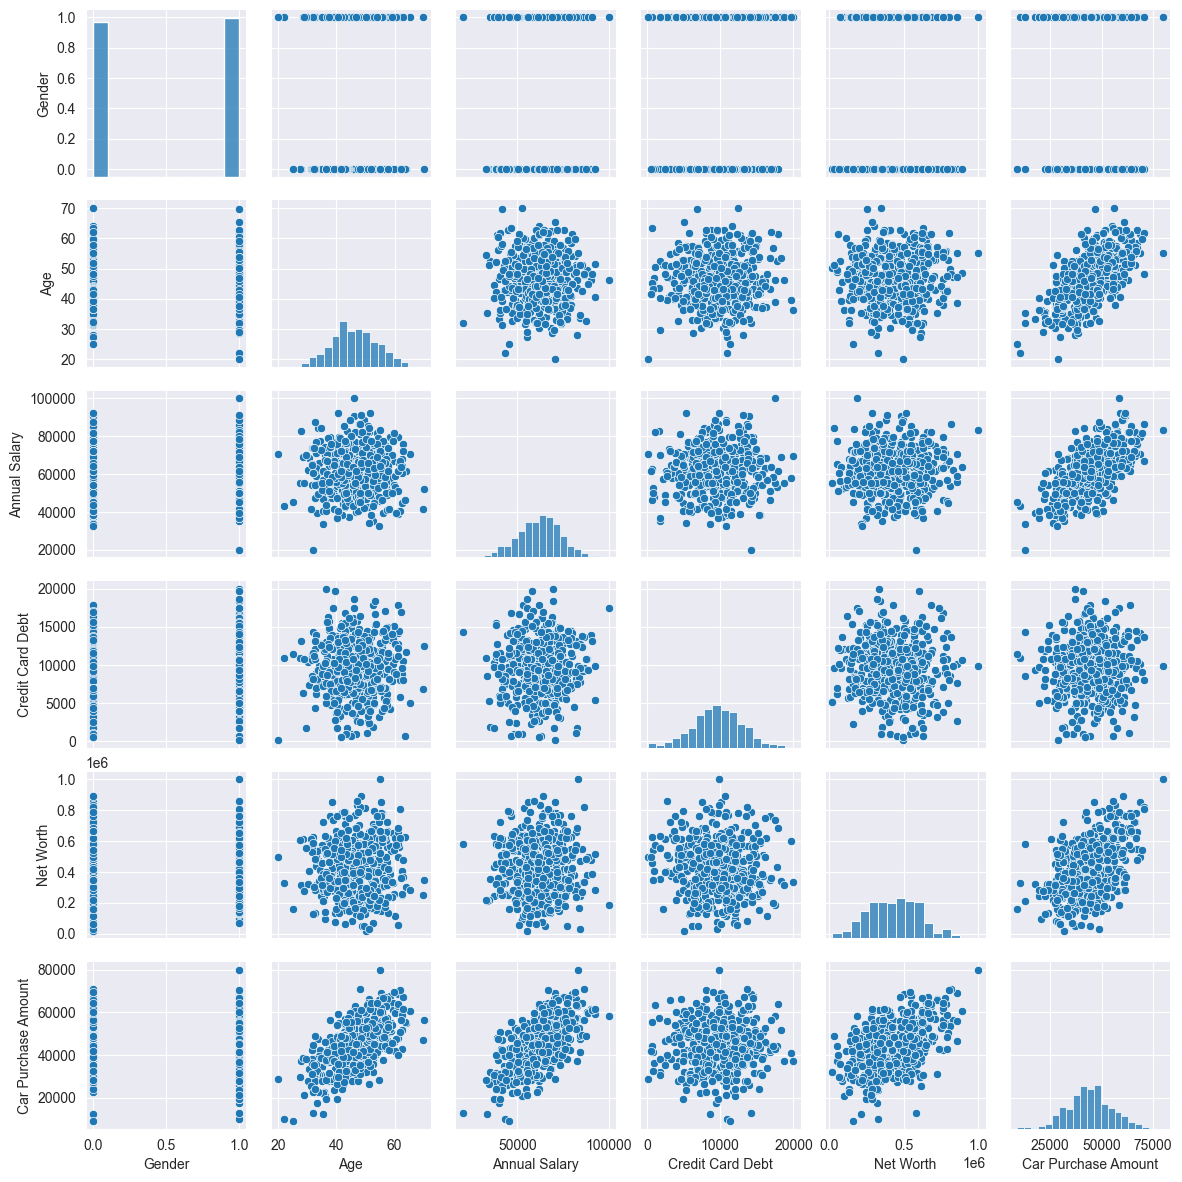

In [5]:
sns.pairplot(car_data, height = 2, aspect = 1)
plt.show()

## Cleaning the dataset

Cleaning the training and testing data by removing variables that we don't need.
This removes unnecessary data that our model can't use, and allows for higher
accuracy.

In [11]:
X = car_data.drop(['Customer Name', 'Customer e-mail', 'Country', 'Car Purchase Amount'], axis = 1)
X

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
0,0,41.851720,62812.09301,11609.380910,238961.2505
1,0,40.870623,66646.89292,9572.957136,530973.9078
2,1,43.152897,53798.55112,11160.355060,638467.1773
3,1,58.271369,79370.03798,14426.164850,548599.0524
4,1,57.313749,59729.15130,5358.712177,560304.0671
...,...,...,...,...,...
495,0,41.462515,71942.40291,6995.902524,541670.1016
496,1,37.642000,56039.49793,12301.456790,360419.0988
497,1,53.943497,68888.77805,10611.606860,764531.3203
498,1,59.160509,49811.99062,14013.034510,337826.6382


> Using the **.drop() function allows us to specify what data we want to remove**. The axis parameter specifies that we want to drop the column (axis = 1) and not the row (axis = 0).

In [12]:
y = car_data['Car Purchase Amount']
y

0      35321.45877
1      45115.52566
2      42925.70921
3      67422.36313
4      55915.46248
          ...     
495    48901.44342
496    31491.41457
497    64147.28888
498    45442.15353
499    45107.22566
Name: Car Purchase Amount, Length: 500, dtype: float64

> Assigning the variable **y to be the Car Purchase Amount column** from the dataset.

In [13]:
X.shape

(500, 5)

> Verifying the shape of the **features dataset which is 500 rows and 7 columns**.

In [14]:
y.shape

(500,)

> Verifying the shape of the features dataset which is **500 rows all in one column**

## Normalizing the data

Without normalizing the data to have them be in a similar numeric range, the model will have horrible accuracy. Which is why its crucial that we scale the data for the model to train properly.

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

> Importing the MinMaxScaler class and **creating the scaler object**

### Scaling the features

In [16]:
X_scaled = scaler.fit_transform(X)
X_scaled.shape

(500, 5)

> **Storing the scaled data values in** a new matrix called **X_scaled**. The .fit_transform function is used to **apply the MinMaxScaler to the X dataset**.

In [17]:
scaler.data_max_

array([1.e+00, 7.e+01, 1.e+05, 2.e+04, 1.e+06])

> Shows the **maximum values** for every column

In [18]:
scaler.data_min_

array([    0.,    20., 20000.,   100., 20000.])

> Shows the **minimum values** for every column

### Scaling the dependent variable

In [19]:
y = y.values.reshape(-1, 1)

> In order for the scaler to be applied to our dependent variable, we have to make sure the **values in the column are between -1 and 1**.

In [20]:
y_scaled = scaler.fit_transform(y)

> **Applying the MinMaxScaler** to the dependent variable column

## Splitting the dataset

Splitting the dataset **into training and testing sets** for the model to be trained and evaluated on. 

In [21]:
from sklearn.model_selection import train_test_split

> Importing the **train_test_split function** from sci-kit learn

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.2)

In [23]:
X_train.shape

(400, 5)

In [24]:
X_test.shape

(100, 5)

## Training the model

In [25]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense

> **Importing Keras** from TensorFlow to train our model in a sequential fashion. The **Sequential class** allows us to just that. Finally, the **Dense class** allows us to build fully connected layers or dense layers.

In [26]:
model = Sequential()
model.add(Dense(units = 500, input_dim = 5, activation = 'relu'))

> Initialize the **variable model to be a object of the Sequential class**, allowing us to build the model sequentially. The sequential class has the **.add() function which allows us to add layers**. The first dense layer accepts the parameters **units which specifies how many nodes** the dense layer should have, the **input_dim which specifies the input size** of the training set, and the **activation function which is relu** (converts negatives into zero).

In [27]:
model.add(Dense(units = 500, activation = 'relu'))

> The .add() function is used to add a second dense layer. The second dense layer **does not need to have a input_dim parameter** because the model is being built sequentially. 

In [28]:
model.add(Dense(units = 1, activation = 'linear'))

> We are using the **linear activation function** because we can assume there is some **linear correlation between the input and the output**.

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               3000      
                                                                 
 dense_1 (Dense)             (None, 500)               250500    
                                                                 
 dense_2 (Dense)             (None, 1)                 501       
                                                                 
Total params: 254001 (992.19 KB)
Trainable params: 254001 (992.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


> The **.summary() function allows us to look at a quick summary** of our model where we can see the layers, output shape, the number of parameters for each layer, and the total number of parameters. The **first layer has 300 parameters** even though we have **50 nodes for all 5 columns** because we have to also account for the **50 bias parameters** associated to each node. 

In [31]:
model.compile(optimizer = 'Adam', loss = 'mean_squared_error')

> Using the **.compile() function is used to configure the model before training**. We can use certain parameters to specify what we want to achieve with the model. The parameter **optimzer specifies which optimizer we want to use**. And the **loss allows us to specify the loss function** we want to use. The **mean squared error** is a type of loss function which **takes the average squared differences of the predicted and true values**. 

In [32]:
results = model.fit(X_train, 
                           y_train, 
                           epochs = 25, 
                           batch_size = 50, 
                           verbose = 1,
                           validation_split = 0.2)

Epoch 1/25
7/7 [==============================] - 2s 49ms/step - loss: 0.0689 - val_loss: 0.0084
Epoch 2/25
7/7 [==============================] - 0s 14ms/step - loss: 0.0141 - val_loss: 0.0062
Epoch 3/25
7/7 [==============================] - 0s 15ms/step - loss: 0.0073 - val_loss: 0.0071
Epoch 4/25
7/7 [==============================] - 0s 13ms/step - loss: 0.0051 - val_loss: 0.0037
Epoch 5/25
7/7 [==============================] - 0s 12ms/step - loss: 0.0033 - val_loss: 0.0026
Epoch 6/25
7/7 [==============================] - 0s 14ms/step - loss: 0.0021 - val_loss: 0.0012
Epoch 7/25
7/7 [==============================] - 0s 17ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 8/25
7/7 [==============================] - 0s 14ms/step - loss: 9.7200e-04 - val_loss: 7.5464e-04
Epoch 9/25
7/7 [==============================] - 0s 14ms/step - loss: 7.0417e-04 - val_loss: 7.4999e-04
Epoch 10/25
7/7 [==============================] - 0s 12ms/step - loss: 6.8758e-04 - val_loss: 6.6701e-04
Epoch

> Training the model and **storing the results in variable results**. We start by using the **.fit() method and specifying certain parameters** for the model to train correctly. The parameters for the method include the **feature's training data and dependent variable training data**. The **epochs** parameter specifies the **number of epochs**, the **batch_size** specifies the **number of data points being fed** into the model at once. The **verbose** parameter specifies how much **information** we want to see about the training on screen, and the **validation_split allows us to split** 20% of the training data into validation data.

## Evaluating the model

In [33]:
results.history.keys()

dict_keys(['loss', 'val_loss'])

> **Accessing the keys** in the dictionary results

In [34]:
loss = results.history['loss']
valid_loss = results.history['val_loss']

> **Extracting the loss values** for training and validation datasets

In [35]:
epochs = range(1, len(loss) + 1)
print(epochs)

range(1, 26)


> Creates a **range containing numbers 1 to 50** to represent the number of our epochs while plotting

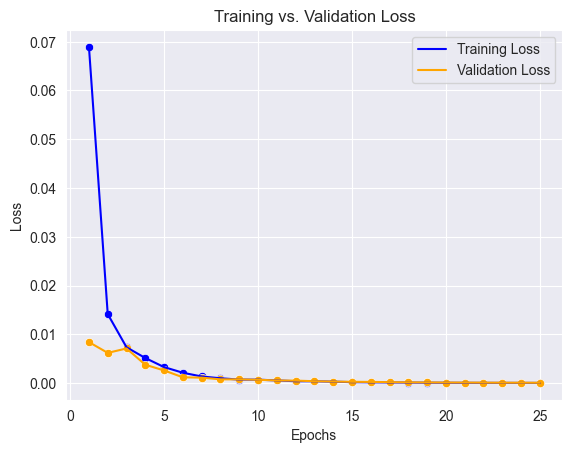

In [36]:
sns.scatterplot(x = epochs, y = loss, color = 'blue')
sns.scatterplot(x = epochs, y = valid_loss, color = 'orange')

sns.lineplot(x = epochs, y = loss, color = 'blue', label = 'Training Loss')
sns.lineplot(x = epochs, y = valid_loss, color = 'orange', label = "Validation Loss")

plt.title('Training vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [37]:
y_predict = model.predict(X_test)

4/4 [==============================] - 0s 0s/step


In [38]:
np.set_printoptions(precision = 2, suppress = True)

In [39]:
y_predict = scaler.inverse_transform(y_predict)
y_test = scaler.inverse_transform(y_test)

In [40]:
differences = y_test - y_predict

In [41]:
percent_diff = (differences / y_test) * 100

In [42]:
comparison = np.concatenate((y_predict, y_test, differences, percent_diff), 1)

In [43]:
comparison

array([[31042.07, 31300.54,   258.48,     0.83],
       [55212.66, 55174.99,   -37.67,    -0.07],
       [45583.08, 45509.7 ,   -73.38,    -0.16],
       [24478.98, 24184.07,  -294.9 ,    -1.22],
       [27009.78, 27187.24,   177.46,     0.65],
       [44050.36, 44424.08,   373.72,     0.84],
       [22294.49, 22630.26,   335.77,     1.48],
       [35625.49, 35784.42,   158.93,     0.44],
       [35545.95, 35726.95,   181.  ,     0.51],
       [51833.52, 51683.61,  -149.91,    -0.29],
       [46978.54, 47715.96,   737.43,     1.55],
       [36388.46, 35848.83,  -539.63,    -1.51],
       [43026.48, 42793.99,  -232.49,    -0.54],
       [35619.66, 35659.12,    39.47,     0.11],
       [46974.27, 46846.73,  -127.54,    -0.27],
       [39939.25, 39433.41,  -505.85,    -1.28],
       [39962.43, 39522.13,  -440.3 ,    -1.11],
       [45331.  , 45112.95,  -218.05,    -0.48],
       [53709.93, 53496.48,  -213.44,    -0.4 ],
       [51662.26, 51730.17,    67.91,     0.13],
       [48953.33, 48

In [44]:
avg_diff = np.mean(differences)
print("Average Difference: {}($)".format(round(avg_diff, 2)))

Average Difference: -36.99($)


In [45]:
avg_diff_percent = np.mean(percent_diff)
print("Average Difference Percent: {}%".format(round(avg_diff_percent, 2)))

Average Difference Percent: -0.09%


In [46]:
total_accuracy = 100 - np.abs(avg_diff_percent)
print("Total Accuracy: {}%".format(round(total_accuracy, 2)))

Total Accuracy: 99.91%
